## **作业07A：使用线性回归预测波士顿房价**
数据文件【boston_house.csv】中存放了数百条波士顿房价信息。每条信息包括14个字段：
* 前13个字段作为特征字段
    * CRIM：城镇人均犯罪率。
    * ZN：住宅用地超过25000平方英尺的比例。
    * INDUS：城镇非零售商用土地的比例。
    * CHAS：查理斯河空变量（如果边界是河流，则为1；否则为0）。
    * NOX：一氧化氮浓度。
    * RM：住宅平均房间数。
    * AGE：1940 年之前建成的自用房屋比例。
    * DIS：到波士顿五个中心区域的加权距离。
    * RAD：辐射性公路的接近指数。
    * TAX：每 10000 美元的全值财产税率。
    * PTRATIO：城镇学生数：教师数的比例。
    * B：1000（Bk-0.63）^ 2，其中 Bk 指代城镇中黑人的比例。
    * LSTAT：人口中地位低下者的比例。
* 第14个字段(MEDV，即平均房价)作为结果字段，以千美元计。  

使用sklearn的线性回归模型，选择3~4个字段进行回归分析。

### **任务1：装载并查看数据信息**
下面的代码从【boston_house.csv】中装载数据，并且显示了部分统计数据：

In [18]:
import numpy as np

data = np.loadtxt('boston_house.csv', delimiter=',',skiprows=1)
print("装载原始数据维度：", data.shape)
features = data[:, :-1]
prices = data[:, -1]
feature_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
# 打印前5条数据
print(feature_names)
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
print(data[:5, :])

# 查看房价统计数据
print("房价数据统计：")
print("最低：%.2f, 最高：%.2f, 平均：%.2f, 中位数：%.2f, 标准差：%.2f" % 
     (np.min(prices), np.max(prices), np.mean(prices), np.median(prices) ,np.std(prices)))

装载原始数据维度： (506, 14)
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
[[ 0.01  18.00  2.31  0.00  0.54  6.58  65.20  4.09  1.00  296.00  15.30
   396.90  4.98  24.00]
 [ 0.03  0.00  7.07  0.00  0.47  6.42  78.90  4.97  2.00  242.00  17.80
   396.90  9.14  21.60]
 [ 0.03  0.00  7.07  0.00  0.47  7.18  61.10  4.97  2.00  242.00  17.80
   392.83  4.03  34.70]
 [ 0.03  0.00  2.18  0.00  0.46  7.00  45.80  6.06  3.00  222.00  18.70
   394.63  2.94  33.40]
 [ 0.07  0.00  2.18  0.00  0.46  7.15  54.20  6.06  3.00  222.00  18.70
   396.90  5.33  36.20]]
房价数据统计：
最低：5.00, 最高：50.00, 平均：22.53, 中位数：21.20, 标准差：9.19


### **任务2：查看各个特征与价格之间的对应关系趋势**
下面的代码分别作出了每个特征与价格之间的对应关系图(散点图)，请从中选出3~4个有较好线性关系的特征，作为下一步线性回归模型的特征  
横坐标为特征，纵坐标为价格

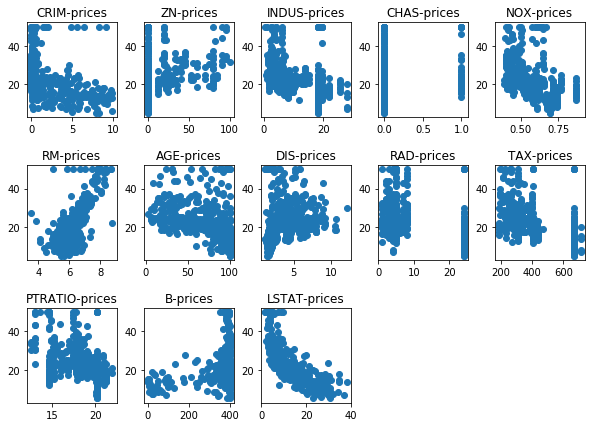

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

row_num = 3
col_num = 5
plt.figure(figsize=(10,7))
for i in range(row_num):
    for j in range(col_num):
        index = i*col_num+j+1
        if (index > len(feature_names)):
            break
        plt.subplot(row_num, col_num, index)
        plt.scatter(features[:, index-1], prices)
        plt.title(feature_names[index-1] + "-" + "prices")

plt.subplots_adjust(wspace = 0.3, hspace = 0.5)
plt.show()

### **任务3：设置训练集和数据集**
* 从原有data集合中，选择若干个特征列(建议3~4个特征列)以及最后一列数据，构成新的数据集
* 将新数据集按照8:2拆分成训练数据集和验证数据集
* 对数据集中的特征(包括训练集和测试集)进行归一化处理

In [20]:
### TODO:向下列column_idx集合中，添加被选中的特征列的下标索引。最后一列(-1)必须选中
column_idx = [5, 10, 12, -1]    # 例如：column_idx = [1,2,3,-1]

data = data[:, column_idx]
np.random.seed(100)    
np.random.shuffle(data)    # 打乱行顺序
train_num = (int)(len(data) * 0.8)
train_features = data[:train_num, :-1]    # 训练数据集
train_prices = data[:train_num, -1]
test_features = data[train_num:, :-1]    # 测试数据集
test_prices = data[train_num:, -1]

# 使用StandardScaler进行归一化处理：x' = (x-mean(x))/std(x)
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
train_features = normalizer.fit_transform(train_features)
test_features = normalizer.transform(test_features)

print("训练数据集特征维度：", train_features.shape)
print("测试数据集特征维度：", test_features.shape)

训练数据集特征维度： (404, 3)
测试数据集特征维度： (102, 3)


### **任务4：使用LinearRegression训练模型，并且针对测试数据计算R2**

In [15]:
from sklearn.linear_model import LinearRegression
model = None
r2 = None
### TODO:创建LinearRegression对象并存放在model变量中

### TODO:使用训练数据训练模型

### TODO：使用测试数据计算R方

# 打印R2
print(r2)

None
